<a href="https://colab.research.google.com/github/tottenjordan/artofficialintelligence/blob/master/RL/Q_Learning_RL_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial guide provided by Reinforcement Learning - A Simple Python Example and a Step closer to AI with Assited Q-Learning ([here](http://amunategui.github.io/reinforcement-learning/))

In [0]:
import numpy as np
import pylab as plt
import networkx as nx

We create a points-list map that represents each direction our bot can take. Using this format allows us to easily create complex graphs but also easily visualize everything with networkx graphs.

In [0]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

Our starting point is 0, our goal point is 7.

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


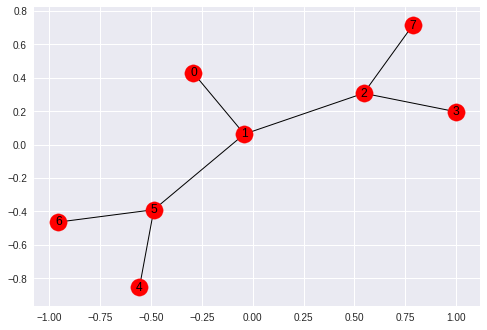

In [20]:
goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

* *(above)* The map shows that point 0 is where our bot will start its journey and point 7 is it’s final goal. The extra added points and false paths are the obstacles the bot will have to contend with.


* *(below)* We then create the rewards graph - this is the matrix version of our list of points map. We initialize the matrix to be the height and width of our points list (8 in this example) and initialize all values to -1:

In [21]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

We then change the values to be 0 if it is a viable path and 100 if it is a goal path 

(for more on this topic, see Mnemosyne_studio’s great [tutorial](http://mnemstudio.org/path-finding-q-learning-tutorial.htm): Deep Q Learning for Video Games - The Math of Intelligence #9)

In [22]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

* *(above)* To read the above matrix, the y-axis is the state or where your bot is currently located, and the x-axis is your possible next actions. 

*  *(below)* We then build our Q-learning matrix which will hold all the lessons learned from our bot.

* The Q-learning model uses a transitional rule formula and gamma is the learning parameter






(see [Deep Q Learning for Video Games](http://mnemstudio.org/path-finding-q-learning-tutorial.htm) - The Math of Intelligence #9 for more details)

In [23]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

Run the training and testing functions that will run the update function 700 times allowing the Q-learning model to figure out the most efficient path:

In [25]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print('Score:', str(score))   
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 244.0
Score: 173.7704918

Most efficient path:
[0, 1, 2, 7]


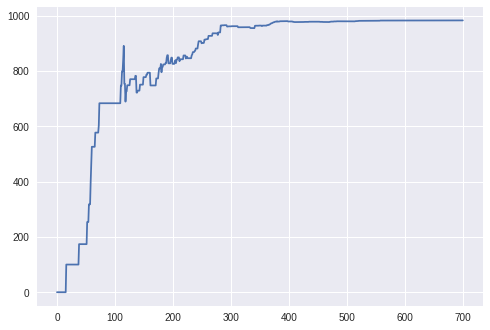

In [28]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index


print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()


## Part 2

* Now let’s take this a step further, look at the top image again, notice how the factory is surrounded by smoke and the hive, by bees. Let’s assume that bees don’t like smoke or factories, thus there will never be a hive or bees around smoke. 

* What if our bot could record those environmental factors and turn them into actionable insight? Whenever the bot finds smoke it can turn around immediately instead of continuing to the factory, whenever it finds bees, it can stick around and assume the hive it close.

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


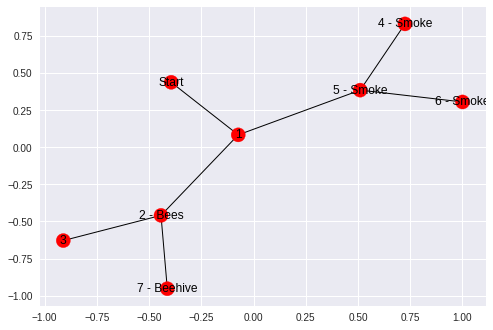

In [29]:
bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()


We assign node 2 as having bees and nodes 4,5,6 as having smoke. Our Q-learning bot doesn’t know yet that there are bees or smoke there nor does it know that bees are good and smoke bad in finding hives. The bot needs to do another run like we just did, but this time it needs to collect environmental factors.

New update function with the capability of updating the Q-learning scores when if finds either bees or smoke.

In [0]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
 
initial_state = 1

In [31]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)

available_act = available_actions(initial_state) 
 
action = sample_next_action(available_act)

def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  environment = collect_environmental_data(action)
  if 'b' in environment: 
    enviro_bees[current_state, action] += 1
  
  if 's' in environment: 
    enviro_smoke[current_state, action] += 1
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state,action,gamma)

max_value 0.0


0

In [32]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 180.0
max_value 180.0
max_value 0.0
max_value 0.0
max_value 144.0
max_value 0.0
max_value 180.0
max_value 144.0
max_value 0.0
max_value 0.0
max_value 144.0
max_value 244.0
max_value 0.0
max_value 115.2
max_value 144.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 144.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 144.0
max_value 0.0
max_value 295.20000000000005
max_value 144.0
max_value 144.0
max_value 0.0
max_value 144.0
max_value 336.1600000000001
max_value 115.2
max_value 144.0
max_value 115.2
max_value 0.0
max_value 368.92800000000005
max_value 115.2
max_value 0.0
max_value 295.14240000000007
max_value 0.0
max_value 0.0
max_value 0.0
max_value 115.2
max_value 295.14240000000007
max_value 0.0
max_value 295.14240000000007
max_value 368.92800000000005
max_value 236.11392000000006
max_value 395.14240000000007
max_value 416.11392000000006

* The environmental matrices show how many bees and smoke the bot found during its journey while searching for the most efficient path to the hive.

We are assuming two things:

1. we modeled the environmental data and found out that the bees have a positive coefficient on finding hives,
2. and smoke, a negative one

Reuse the environmental matrix already mapped out for our landscape





In [33]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_matrix[current_state, action] += 1
    if 's' in environment: 
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

max_value 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 100.0
max_value 180.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 244.0
Score: 173.77049180327867
max_value 0.0
Score: 173.77049180327867
max_value 244.0
Score: 200.0
going from: [0 2 5]
to: [0 2]
max_value 195.20000000000002
Score: 280.0
max_value 0.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 195.20000000000002
Score: 360.0
max_value 195.20000000000002
Score: 360.0
going from: [1 4 6]
to: [1]
max_value 156.16000000000003
Score: 424.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 424.0
max_value 295.20000000000005

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


 244.7410009315738
Score: 839.9853550534791
max_value 382.40781395558406
Score: 839.9853550534791
max_value 244.7410009315738
Score: 839.9853550534791
max_value 244.7410009315738
Score: 839.9853550534791
max_value 244.7410009315738
Score: 839.9853550534791
max_value 305.92625116446726
Score: 839.9853550534791
max_value 382.40781395558406
Score: 839.9853550534791
max_value 485.92625116446726
Score: 834.6273567954931
max_value 244.7410009315738
Score: 834.6273567954931
max_value 244.7410009315738
Score: 834.6273567954931
going from: [0 2 5]
to: [0 2]
max_value 244.7410009315738
Score: 834.6273567954931
max_value 305.92625116446726
Score: 834.6273567954931
max_value 382.40781395558406
Score: 834.6273567954931
going from: [1 4 6]
to: [1]
max_value 305.92625116446726
Score: 834.6273567954931
max_value 305.92625116446726
Score: 834.6273567954931
max_value 244.7410009315738
Score: 834.6273567954931
max_value 244.7410009315738
Score: 834.6273567954931
going from: [0 2 5]
to: [0 2]
max_value 24

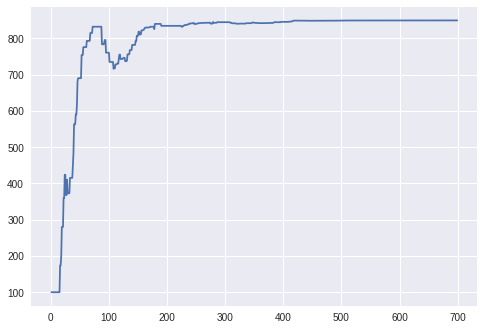

In [34]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

plt.plot(scores)
plt.show()

The bot converges in less tries (approx. 100 less) than our original model. Note: this is not meant to be a controlled environment to compare both approaches, just a tutorial for exploring different ways of applying reinforced learning for discovery